# **Analysis of Sleep Disorders**

## Project Background

This project explores how some lifestyle factors and health metrics correlate to the likelihood of a person having a sleeping disorder. Good quality sleep is vital to ensuring a long and healthy life so it’s detrimental to public health that the prevalence of sleep disorders is on the rise. Although this analysis cannot prove causation, understanding the variables that correlate with sleep disorders can guide interventions to promote healthy habits and prevent sleep disturbances, improving overall well-being.

Hypothesis: Negative health metrics such as high heart rate, low physical activity levels and low daily steps will be strongly correlated with the likelihood of the person also experiencing a sleep disorder.

## Hypothesis

Negative health metrics such as high heart rate, low physical activity levels and low daily steps will be strongly correlated with the likelihood of the person also experiencing a sleep disorder.


## Importing Libraries

In [847]:
#Reading data
import pandas as pd


#Fixings warnings
import warnings 
warnings.filterwarnings('ignore')


#For numerical operations
import numpy as np


#Visualisation
import seaborn as sns 
import plotly.express as px
from termcolor import colored
import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import plotly.figure_factory as ff

#Stats
import statsmodels.api as sm

#Data spliting
from sklearn.model_selection import train_test_split

## Importing CSV from Kaggle dataset

In [848]:
#Importing the CSV
sleep_data=pd.read_csv(r'C:\Users\AdamJ\Desktop\Python\DataScienceProfPractice\BPPDSPP\Sleep_health_and_lifestyle_dataset.csv')

## Dataset Processing

The data used for this project is publically available from the Kaggle 'Sleep Health and Lifestyle Dataset' dataset. The dataset was chosen as it contained the metrics needed for this evaluation.

[Link to Dataset](https://www.kaggle.com/datasets/uom190346a/sleep-health-and-lifestyle-dataset/data)

### Data Fields

- Person ID: An identifier for each individual.
- Gender: The gender of the person (Male/Female).
- Age: The age of the person in years.
- Occupation: The occupation or profession of the person.
- Sleep Duration (hours): The number of hours the person sleeps per day.
- Quality of Sleep (scale: 1-10): A subjective rating of the quality of sleep, ranging from 1 to 10.
- Physical Activity Level (minutes/day): The number of minutes the person engages in physical activity daily.
- Stress Level (scale: 1-10): A subjective rating of the stress level experienced by the person, ranging from 1 to 10.
- BMI Category: The BMI category of the person (e.g., Underweight, Normal, Overweight).
- Blood Pressure (systolic/diastolic): The blood pressure measurement of the person, indicated as systolic pressure over diastolic pressure.
- Heart Rate (bpm): The resting heart rate of the person in beats per minute.
- Daily Steps: The number of steps the person takes per day.
- Sleep Disorder: The presence or absence of a sleep disorder in the person (None, Insomnia, Sleep Apnea).



## First 50 rows of the dataset

Scanning through the first 50 rows allows me to look for any potential problems in the dataset.

In [849]:
#Displaying the first 10 rows of the dataset
print("First 10 rows of the Dataset")
sleep_data.head(500)

First 10 rows of the Dataset


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


## Data Quality

Checking the quality of the data is essential to make the data fit for analysis without errors. Below are the checks I did to ensure good data quality.

### Completeness and accuracy

Looking for null value which might make working on the dataset hard and cause errors. After finding that the sleep disorder column has a null value when the person doesn't have a sleep disorder this was replaced with 'None'.

In [850]:
#Looking for empty/null values
print("Dataset Information")
sleep_data.info()

Dataset Information
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [851]:
#Replacing the null values in Sleep Disorder with 'None'
sleep_data['Sleep Disorder'] = sleep_data['Sleep Disorder'].fillna('None')

In [852]:
#Checking the top 10 results again to see 'None' in the sleep disorder column
sleep_data.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
6,7,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
7,8,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
8,9,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
9,10,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None


### Consistency

After seeing that the BMI category could have the values of both 'Normal' and 'Normal Weight' these were combined to just 'Normal' as splitting by both of these would be incorrect.

In [853]:
#Making 'Normal' and Normal Weight' the same value in BMI Category
sleep_data["BMI Category"] = sleep_data["BMI Category"].replace(["Normal Weight"], "Normal")

### Reliability

Looking at the statistical values for the continuous columns in the dataset to again look for errors in the min/max etc. 

In [854]:
#Looking at the statistical values of our dataset
sleep_data.describe()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
count,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000,374.000000
mean,187.500000,42.184492,7.132086,7.312834,59.171123,5.385027,70.165775,6816.844920
std,108.108742,8.673133,0.795657,1.196956,20.830804,1.774526,4.135676,1617.915679
min,1.000000,27.000000,5.800000,4.000000,30.000000,3.000000,65.000000,3000.000000
25%,94.250000,35.250000,6.400000,6.000000,45.000000,4.000000,68.000000,5600.000000
50%,187.500000,43.000000,7.200000,7.000000,60.000000,5.000000,70.000000,7000.000000
75%,280.750000,50.000000,7.800000,8.000000,75.000000,7.000000,72.000000,8000.000000
max,374.000000,59.000000,8.500000,9.000000,90.000000,8.000000,86.000000,10000.000000


Looking at statistical values for the categorical variables for possible errors.

In [855]:
#To show stats for categorical values/strings
sleep_data.describe(include='O')

,Gender,Occupation,BMI Category,Blood Pressure,Sleep Disorder
count,374,374,374,374,374
unique,2,11,3,25,3
top,Male,Nurse,Normal,130/85,None
freq,189,73,216,99,219


Looking for duplicate values in the dataset as duplicates in a dataset of only 374 rows could be correct but highly unlikely to be identical in this small of a dataset.

In [856]:
#Look for duplicates in the data (Could be correct but highly unlikely to be identical in this small of a dataset)
sleep_data.duplicated().sum()

0

### Validity

Renaming the columns to better describe the information they hold.

In [857]:
#Renaming columns 
sleep_data = sleep_data.rename(columns={'Quality of Sleep': 'Quality of Sleep (scale: 1-10)'})
sleep_data = sleep_data.rename(columns={'Stress Level': 'Stress Level (scale: 1-10)'})

### Relevance

This analysis wont inclue blood pressure so the column was removed/dropped.

In [858]:
#Removing columns we wont use
sleep_data = sleep_data.drop(columns=['Blood Pressure'])

The end goal is to look at overall likelihood of any sleep disorder so another column which indicates if the person has a sleeping disorder or not.

In [859]:
#Adding Sleep Disorder (Yes/No) Column
sleep_data['Sleep Disorder (Yes/No)'] = np.where(sleep_data['Sleep Disorder']!='None','Yes','No')
sleep_data.head(10)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep (scale: 1-10),Physical Activity Level,Stress Level (scale: 1-10),BMI Category,Heart Rate,Daily Steps,Sleep Disorder,Sleep Disorder (Yes/No)
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,77,4200,None,No
1,2,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,No
2,3,Male,28,Doctor,6.2,6,60,8,Normal,75,10000,None,No
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,Yes
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,85,3000,Sleep Apnea,Yes
5,6,Male,28,Software Engineer,5.9,4,30,8,Obese,85,3000,Insomnia,Yes
6,7,Male,29,Teacher,6.3,6,40,7,Obese,82,3500,Insomnia,Yes
7,8,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,None,No
8,9,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,None,No
9,10,Male,29,Doctor,7.8,7,75,6,Normal,70,8000,None,No


Checking that all the columns are included/excluded as expected

In [860]:
#Printing all the different columns in the CSV
print(sleep_data.columns)

Index(['Person ID', 'Gender', 'Age', 'Occupation', 'Sleep Duration',
       'Quality of Sleep (scale: 1-10)', 'Physical Activity Level',
       'Stress Level (scale: 1-10)', 'BMI Category', 'Heart Rate',
       'Daily Steps', 'Sleep Disorder', 'Sleep Disorder (Yes/No)'],
      dtype='object')


Looking at the number of unique values for each of the fields

In [861]:
#Count of unique values in each of the columns
print(sleep_data.nunique())

Person ID                         374
Gender                              2
Age                                31
Occupation                         11
Sleep Duration                     27
Quality of Sleep (scale: 1-10)      6
Physical Activity Level            16
Stress Level (scale: 1-10)          6
BMI Category                        3
Heart Rate                         19
Daily Steps                        20
Sleep Disorder                      3
Sleep Disorder (Yes/No)             2
dtype: int64


## EDA (Exploratory data analysis)

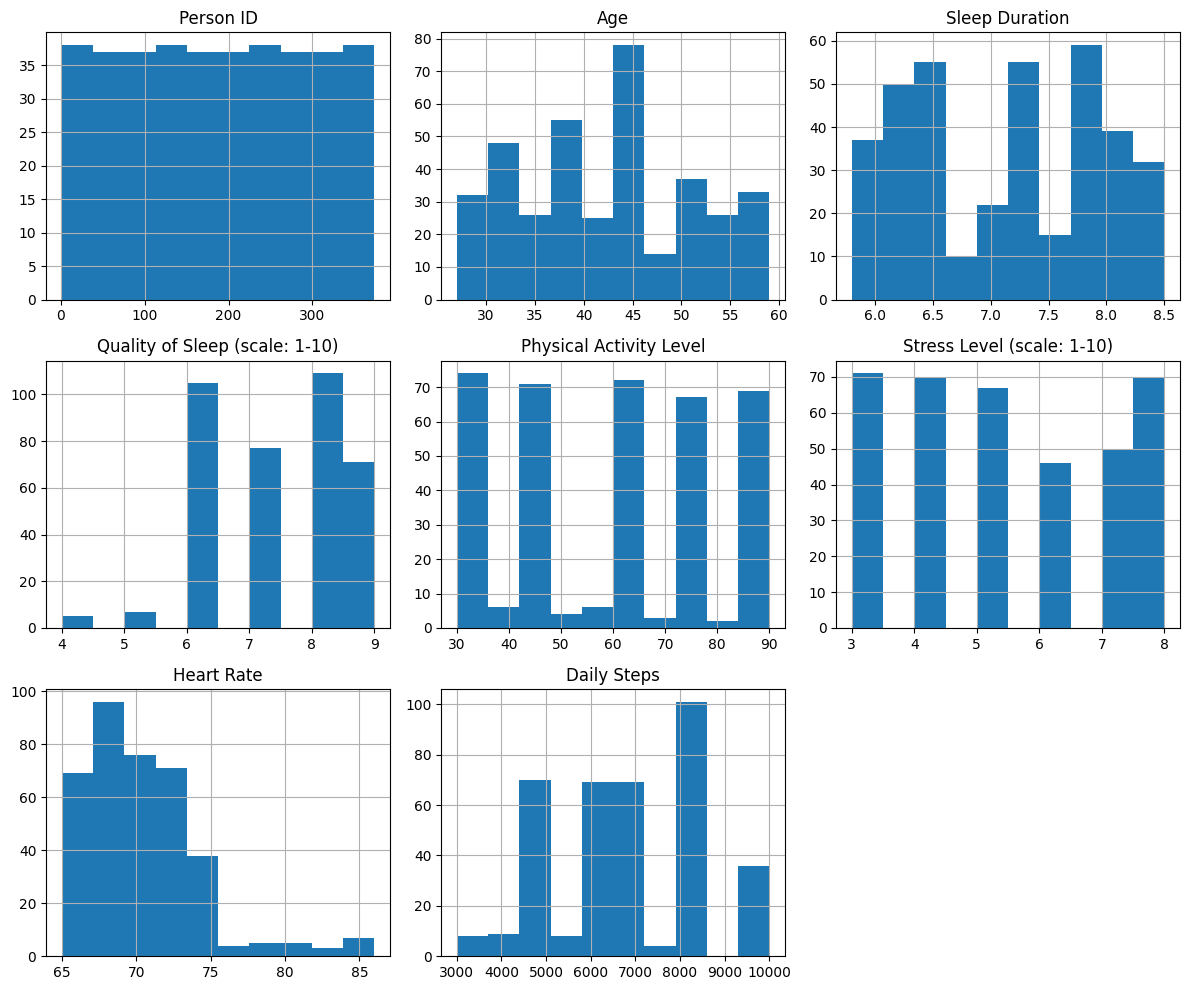

In [862]:
#Histograms for count of results in numeric columns
sleep_data.hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

### Gender EDA

In [863]:
#EDA on gender distibution
gender_split = sleep_data['Gender'].value_counts().reset_index()
print(gender_split)

   Gender  count
0    Male    189
1  Female    185


In [864]:
#Split genders into sleep disorder yes/no
gender_split = sleep_data.groupby('Gender')['Sleep Disorder (Yes/No)'].value_counts()
print(gender_split)

#Percentage of each gender who have a sleep disorder
gender_sleep_disorder = sleep_data.groupby('Gender')['Sleep Disorder (Yes/No)'].value_counts(normalize=True).unstack()
percentage_sleep_disorder = gender_sleep_disorder['Yes'] * 100
print(percentage_sleep_disorder)

Gender  Sleep Disorder (Yes/No)
Female  Yes                        103
        No                          82
Male    No                         137
        Yes                         52
Name: count, dtype: int64
Gender
Female    55.675676
Male      27.513228
Name: Yes, dtype: float64


In [865]:
#Split the sleep disorder by gender
sleep_data.groupby('Sleep Disorder')['Gender'].value_counts()

Sleep Disorder  Gender
Insomnia        Male       41
                Female     36
None            Male      137
                Female     82
Sleep Apnea     Female     67
                Male       11
Name: count, dtype: int64

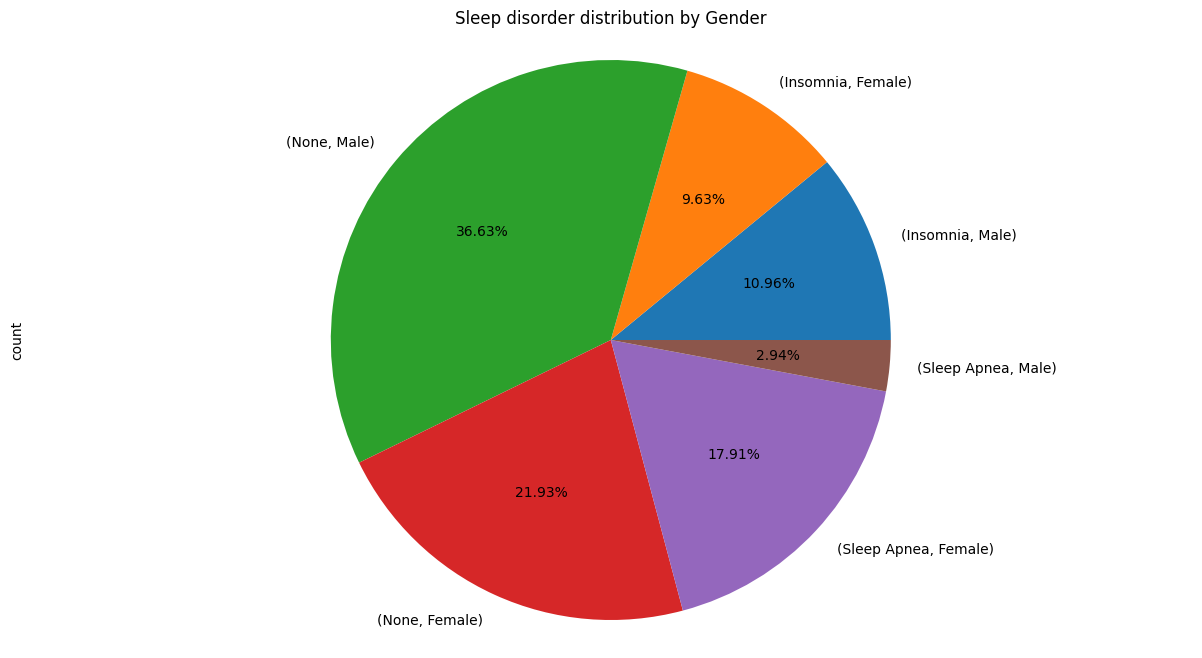

In [866]:
#Pie chart to show distribution of gender and sleep disorder
sleep_data.groupby('Sleep Disorder')['Gender'].value_counts().plot.pie(autopct ='%1.2f%%',figsize=(15, 8))
                                                                      
plt.title('Sleep disorder distribution by Gender')
plt.axis('equal')
plt.show()

#### Findings

- Females are more likely to experience a sleeping disorder at 56% with males only experiencing a sleeping disorder 28% of the time.
- Females are far more likely to experience Sleep apnea than males.

### Age EDA

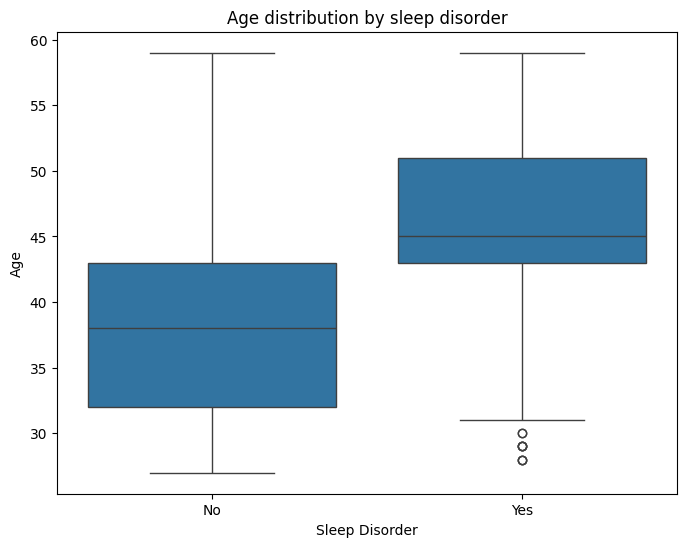

In [867]:
#Boxplot of age distribution for sleep disorder occurance
plt.figure(figsize=(8, 6))
sns.boxplot(x='Sleep Disorder (Yes/No)', y='Age', data= sleep_data)
plt.title('Age distribution by sleep disorder')
plt.xlabel('Sleep Disorder')
plt.ylabel('Age')
plt.show()

Text(0, 0.5, 'Count')

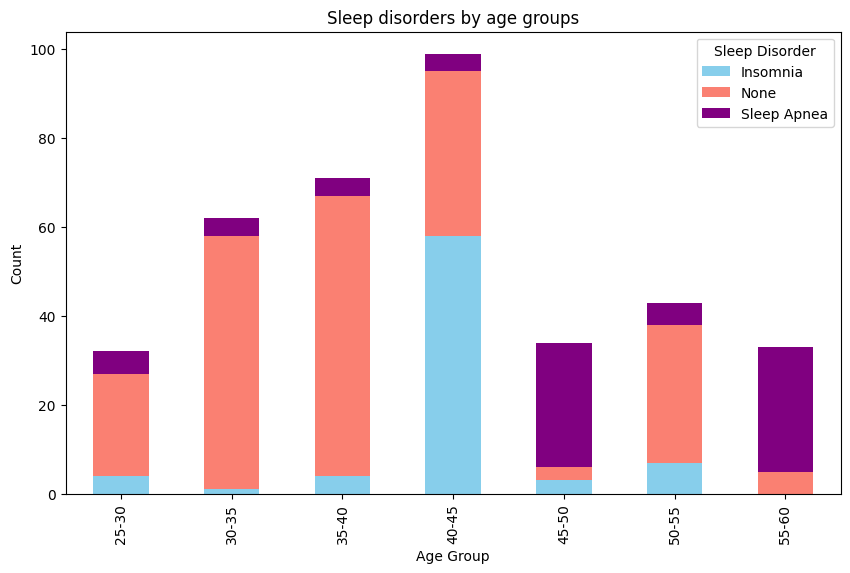

In [868]:
#Create age groups (bins) for visualisation
bins = [25,30,35,40,45,50,55,60]  # Define age groups
labels = ['25-30','30-35','35-40','40-45','45-50','50-55','55-60']  # Labels for age groups

sleep_data['Age'] = pd.cut(sleep_data['Age'], bins=bins, labels=labels)

#Count occurrences of Sleep disorders for age group
age_count = sleep_data.groupby(['Age', 'Sleep Disorder']).size().unstack()

colors = ['skyblue', 'salmon', 'Purple']

#Plot a stacked bar chart
age_count.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors)
plt.title('Sleep disorders by age groups')
plt.xlabel('Age Group')
plt.ylabel('Count')


#### Findings

- The 40-45 age group is the mean and has the highest percentage of people with insomnia.
- Both the 45-50 and 55-60 age groups have a high percentage of people with sleep apnea.

### BMI EDA

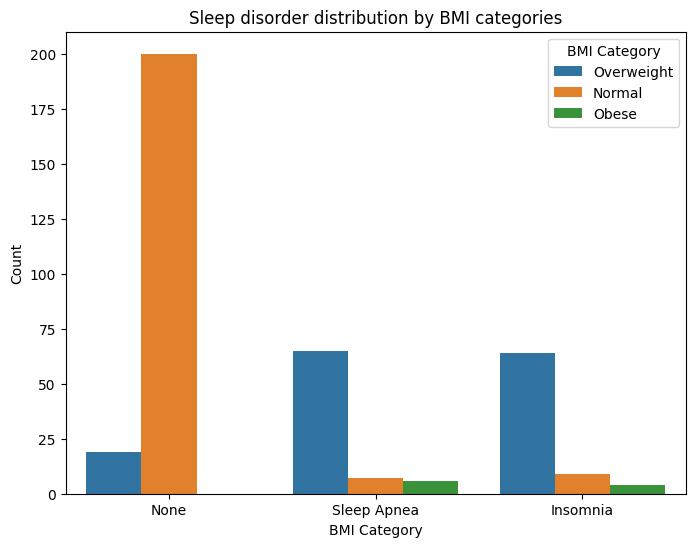

In [869]:
#Sleep disorders by BMI Category
plt.figure(figsize=(8, 6))
sns.countplot(x='Sleep Disorder', hue='BMI Category', data=sleep_data)

plt.title('Sleep disorder distribution by BMI categories')
plt.xlabel('BMI Category')
plt.ylabel('Count')

plt.show()

#### Findings

- Everyone who is obese experiences a sleep disorder.
- Most people who are obese experience either sleep apnea or insomnia
- Most people of normal BMI range experience no sleep disorder.

### Occupation type EDA

In [870]:
#Splitting by occupation type
occupation_split = sleep_data['Occupation'].value_counts().reset_index()
print(occupation_split)

              Occupation  count
0                  Nurse     73
1                 Doctor     71
2               Engineer     63
3                 Lawyer     47
4                Teacher     40
5             Accountant     37
6            Salesperson     32
7      Software Engineer      4
8              Scientist      4
9   Sales Representative      2
10               Manager      1


In [871]:
#Split the sleep disorder by Occupation
sleep_data.groupby('Occupation')['Sleep Disorder'].value_counts()

Occupation            Sleep Disorder
Accountant            None              30
                      Insomnia           7
Doctor                None              64
                      Sleep Apnea        4
                      Insomnia           3
Engineer              None              57
                      Insomnia           5
                      Sleep Apnea        1
Lawyer                None              42
                      Sleep Apnea        3
                      Insomnia           2
Manager               None               1
Nurse                 Sleep Apnea       61
                      None               9
                      Insomnia           3
Sales Representative  Sleep Apnea        2
Salesperson           Insomnia          29
                      None               2
                      Sleep Apnea        1
Scientist             None               2
                      Sleep Apnea        2
Software Engineer     None               3
                 

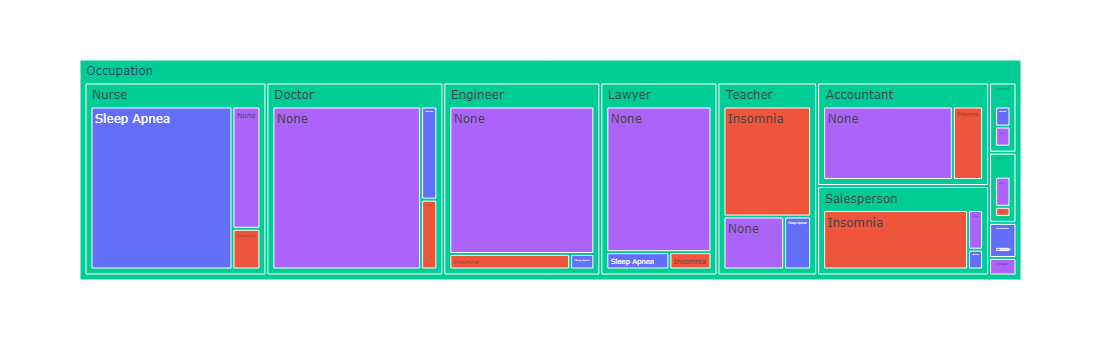

In [872]:
#Treemap of Occupation types by sleep disorder
fig = px.treemap(sleep_data, path=[px.Constant('Occupation'), 'Occupation', 'Sleep Disorder'],
                 color='Sleep Disorder', branchvalues='total')
fig.show()

#### Findings

- Salespeople and teachers have a much higher likelihood of having insomnia than any other occupation
- Nurses experience sleep apnea at a much higher rate than other occupations

### EDA Sleep duration

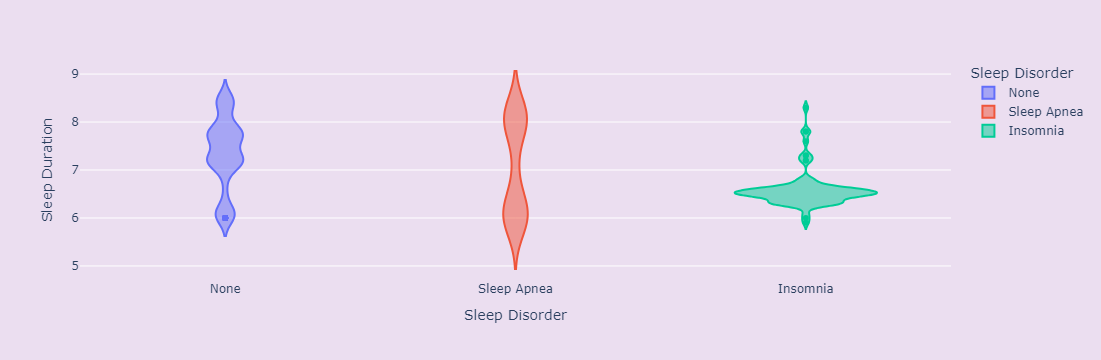

In [873]:
#Violin Plot of distribution of sleep duration by sleep disorder
fig = px.violin(sleep_data, x='Sleep Disorder',y='Sleep Duration',
                 color='Sleep Disorder')

fig.update_layout(paper_bgcolor='#EBDEF0', plot_bgcolor='#EBDEF0')

fig.show()

#### Findings



Quality of Sleep (scale: 1-10)  Sleep Disorder
4                               Sleep Apnea         4
                                Insomnia            1
5                               Insomnia            4
                                Sleep Apnea         3
6                               None               40
                                Sleep Apnea        33
                                Insomnia           32
7                               None               40
                                Insomnia           34
                                Sleep Apnea         3
8                               None              101
                                Insomnia            5
                                Sleep Apnea         3
9                               None               38
                                Sleep Apnea        32
                                Insomnia            1
Name: count, dtype: int64


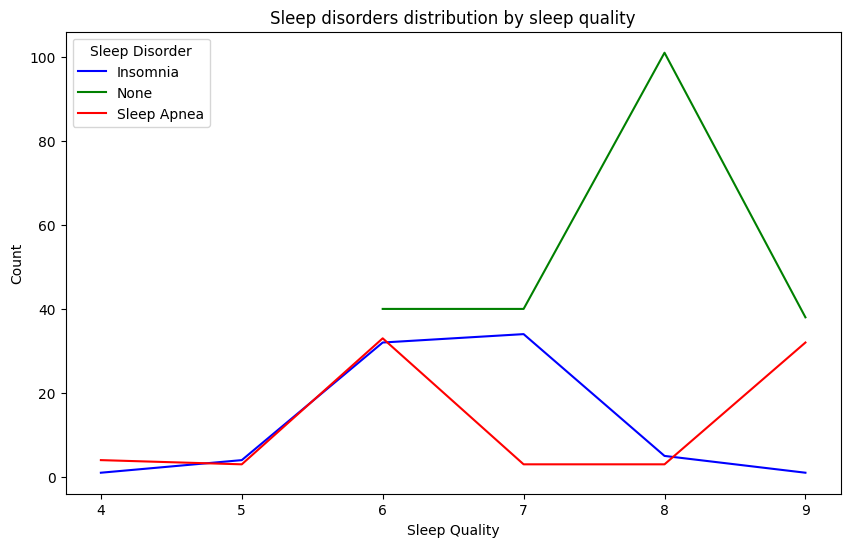

In [874]:
#Count of sleep disorders by quality of sleep
quality_split = sleep_data.groupby('Quality of Sleep (scale: 1-10)')['Sleep Disorder'].value_counts()
print (quality_split)

#plotting a line chart of sleep disorder distribution by sleep quality
quality_count.plot(kind='line', figsize=(10, 6), color=['blue', 'green', 'red', 'orange', 'purple'])
plt.title('Sleep disorders distribution by sleep quality')
plt.xlabel('Sleep Quality')
plt.ylabel('Count')
plt.show()

Stress Level (scale: 1-10)  Sleep Disorder
3                           None              40
                            Sleep Apnea       30
                            Insomnia           1
4                           None              43
                            Insomnia          24
                            Sleep Apnea        3
5                           None              57
                            Insomnia           6
                            Sleep Apnea        4
6                           None              43
                            Insomnia           2
                            Sleep Apnea        1
7                           Insomnia          41
                            Sleep Apnea        6
                            None               3
8                           Sleep Apnea       34
                            None              33
                            Insomnia           3
Name: count, dtype: int64


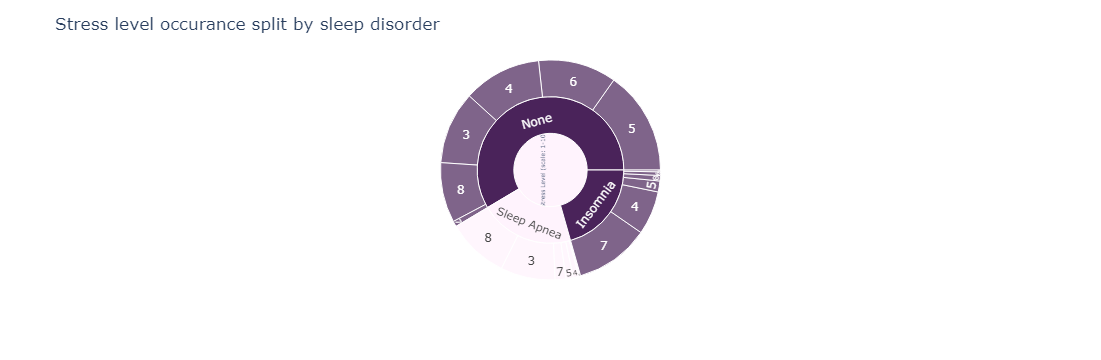

In [875]:
#stress level by sleep disorder
Stess_split = sleep_data.groupby('Stress Level (scale: 1-10)')['Sleep Disorder'].value_counts()
print (Stess_split)

#Sunburst plot of Stress level occurance split by sleep disorder
fig=px.sunburst(sleep_data,path=[px.Constant('Stress Level (scale: 1-10)'),'Sleep Disorder','Stress Level (scale: 1-10)'],
               color='Sleep Disorder'
               ,color_discrete_sequence=['#4A235A','#FFF3FD'])
fig.update_layout(title='Stress level occurance split by sleep disorder')
fig.show()

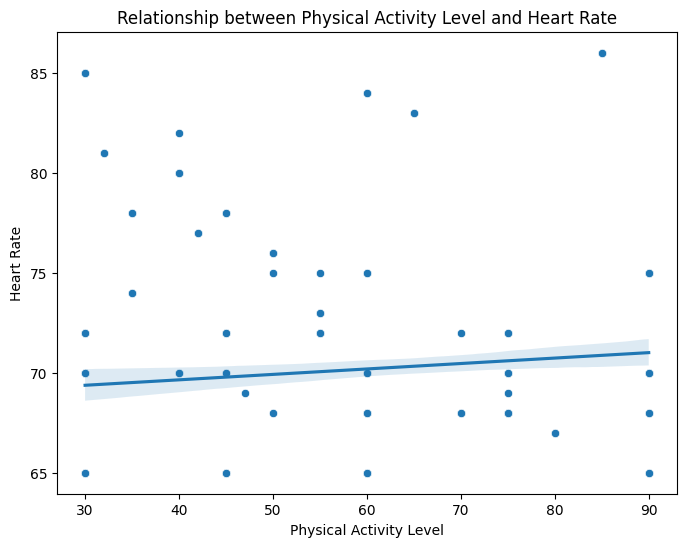

In [876]:
#Scatter chart with trendline to show heart rate by physical activity level
plt.figure(figsize=(8, 6))
sns.scatterplot(data=sleep_data, x='Physical Activity Level', y='Heart Rate')
sns.regplot(data=sleep_data, x='Physical Activity Level', y='Heart Rate', scatter=False)
plt.title('Relationship between Physical Activity Level and Heart Rate')
plt.show()

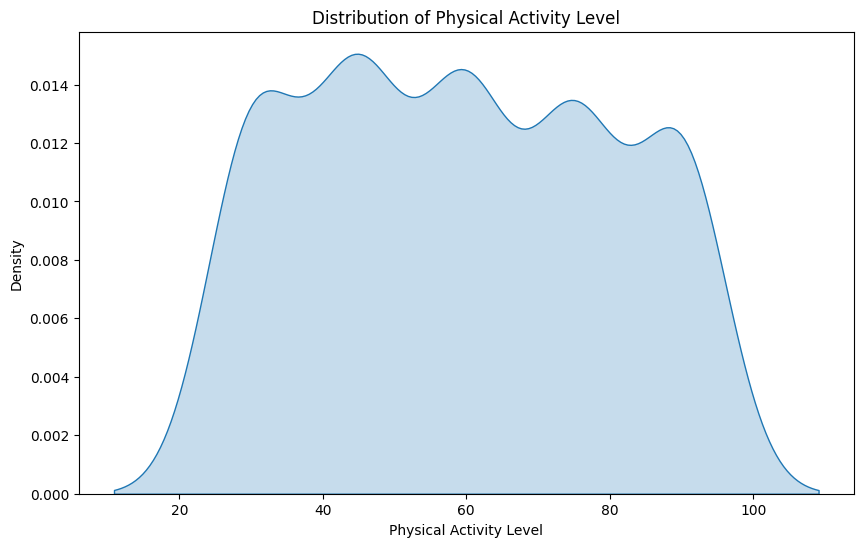

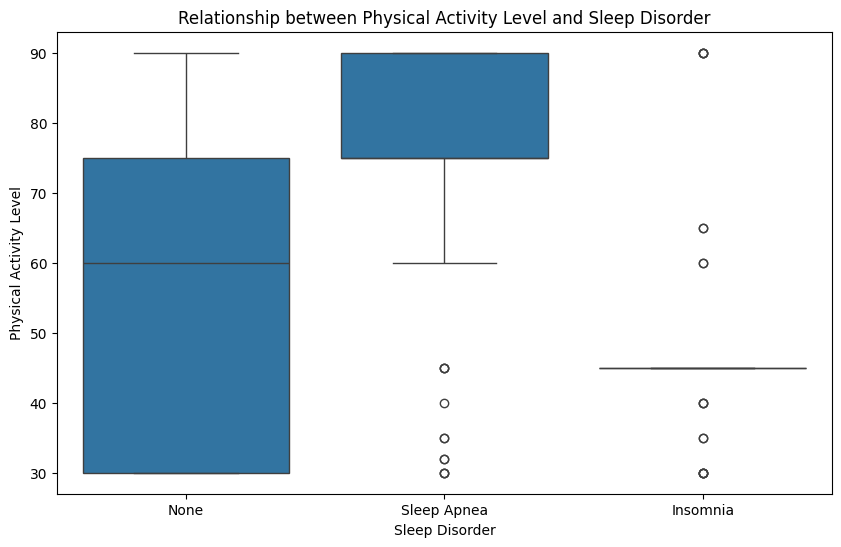

In [877]:
#Distibution of sleep activity level using kde plot
plt.figure(figsize=(10, 6))
sns.kdeplot(data=sleep_data, x='Physical Activity Level', fill=True)
plt.xlabel('Physical Activity Level')
plt.ylabel('Density')
plt.title('Distribution of Physical Activity Level')
plt.show()

#Boxplot of the relationship between Physical Activity Level and Sleep Disorder
plt.figure(figsize=(10, 6))
sns.boxplot(data=sleep_data, x='Sleep Disorder', y='Physical Activity Level')
plt.xlabel('Sleep Disorder')
plt.ylabel('Physical Activity Level')
plt.title('Relationship between Physical Activity Level and Sleep Disorder')
plt.show()

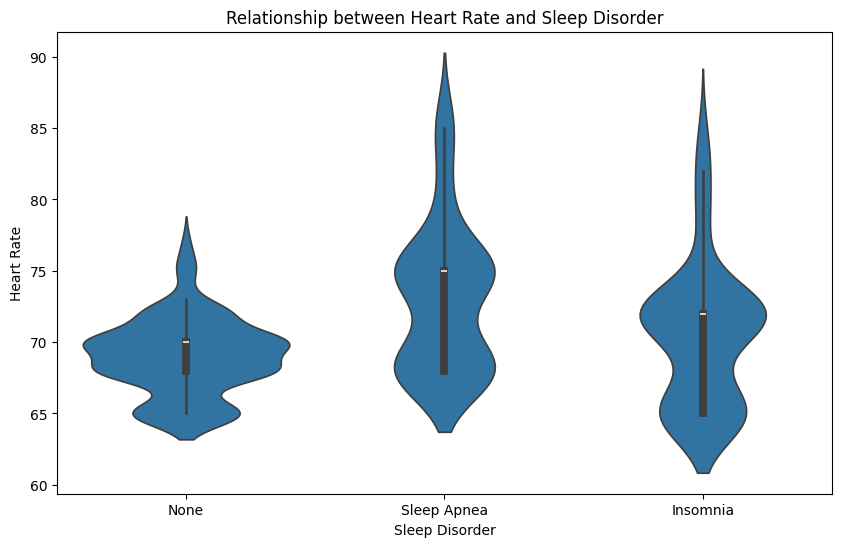

In [878]:
#Violin Plot of heart rate occurance by sleep disorder
plt.figure(figsize=(10, 6))
sns.violinplot(data=sleep_data, x='Sleep Disorder', y='Heart Rate')
plt.xlabel('Sleep Disorder')
plt.ylabel('Heart Rate')
plt.title('Relationship between Heart Rate and Sleep Disorder')
plt.show()

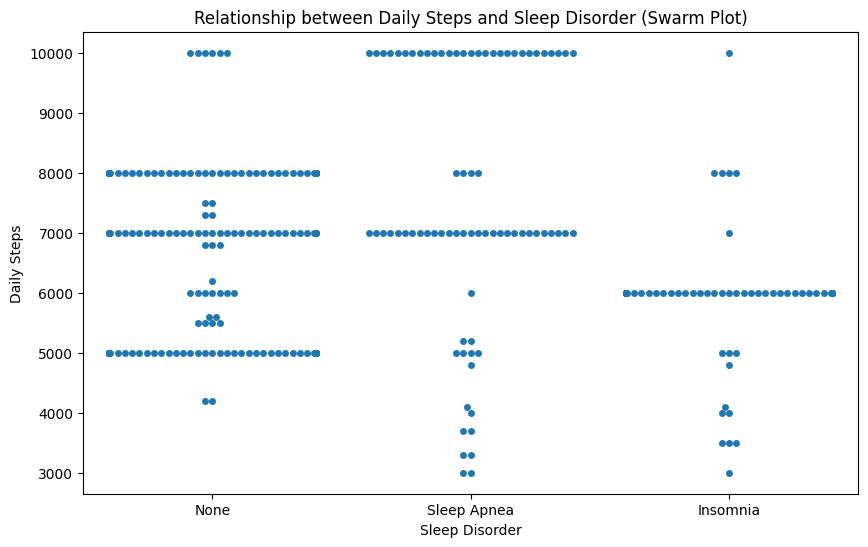

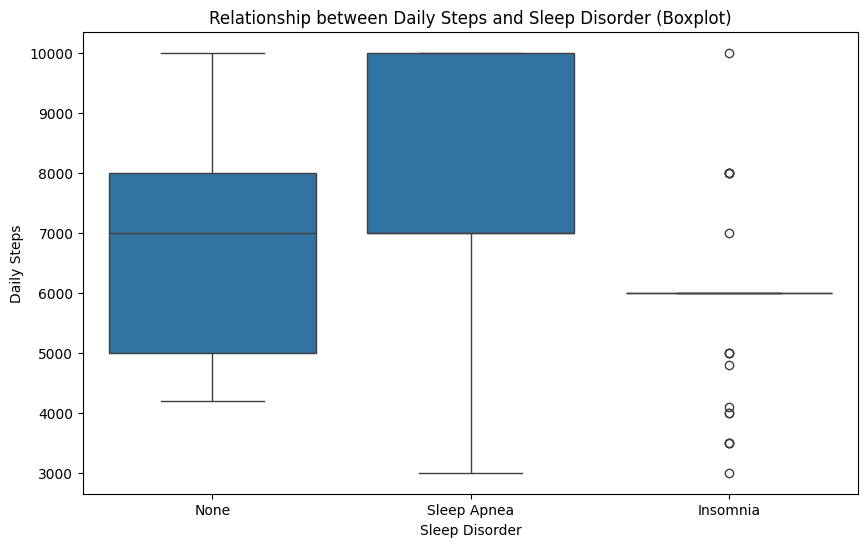

In [879]:
#Swarm Plot of  by sleep disorder by daily steps
plt.figure(figsize=(10, 6))
sns.swarmplot(data=sleep_data, x='Sleep Disorder', y='Daily Steps')
plt.xlabel('Sleep Disorder')
plt.ylabel('Daily Steps')
plt.title('Relationship between Daily Steps and Sleep Disorder (Swarm Plot)')
plt.show()

#Boxplot Plot of  by sleep disorder by daily steps
plt.figure(figsize=(10, 6))
sns.boxplot(data=sleep_data, x='Sleep Disorder', y='Daily Steps')
plt.xlabel('Sleep Disorder')
plt.ylabel('Daily Steps')
plt.title('Relationship between Daily Steps and Sleep Disorder (Boxplot)')
plt.show()

In [880]:
#Logistic regression on Physical activity and sleep disorder Likelihood

#Define the independent variable (predictor)
X = sleep_data[['Physical Activity Level']]

#Define the dependent variable
y = sleep_data['Sleep Disorder (Yes/No)']

#Convert categorical variable to numerical (0 or 1)
y = y.replace({'Yes': 1, 'No': 0})

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize the logistic regression model
model = LogisticRegression()

#Fit the model to the training data
model.fit(X_train, y_train)

#Make predictions on the testing data
y_pred = model.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Generate classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.5733333333333334
              precision    recall  f1-score   support

           0       0.57      1.00      0.73        43
           1       0.00      0.00      0.00        32

    accuracy                           0.57        75
   macro avg       0.29      0.50      0.36        75
weighted avg       0.33      0.57      0.42        75



In [881]:
#Logistic regression on Heart rate and sleep disorder likelihood

#Define the independent variable (predictor)
X = sleep_data[['Heart Rate']]

#Define the dependent variable
y = sleep_data['Sleep Disorder (Yes/No)']

#Convert categorical variable to numerical (0 or 1)
y = y.replace({'Yes': 1, 'No': 0})

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize the logistic regression model
model = LogisticRegression()

#Fit the model to the training data
model.fit(X_train, y_train)

#Make predictions on the testing data
y_pred = model.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Generate classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.6933333333333334
              precision    recall  f1-score   support

           0       0.66      0.98      0.79        43
           1       0.91      0.31      0.47        32

    accuracy                           0.69        75
   macro avg       0.78      0.64      0.63        75
weighted avg       0.76      0.69      0.65        75



In [882]:
#Logistic regression on Daily steps and sleep disorder likelihood

#Define the independent variable (predictor)
X = sleep_data[['Daily Steps']]

#Define the dependent variable
y = sleep_data['Sleep Disorder (Yes/No)']

#Convert categorical variable to numerical (0 or 1)
y = y.replace({'Yes': 1, 'No': 0})

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize the logistic regression model
model = LogisticRegression()

#Fit the model to the training data
model.fit(X_train, y_train)

#Make predictions on the testing data
y_pred = model.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Generate classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.5733333333333334
              precision    recall  f1-score   support

           0       0.57      1.00      0.73        43
           1       0.00      0.00      0.00        32

    accuracy                           0.57        75
   macro avg       0.29      0.50      0.36        75
weighted avg       0.33      0.57      0.42        75



Accuracy: 0.6933333333333334
              precision    recall  f1-score   support

           0       0.73      0.74      0.74        43
           1       0.65      0.62      0.63        32

    accuracy                           0.69        75
   macro avg       0.69      0.68      0.69        75
weighted avg       0.69      0.69      0.69        75



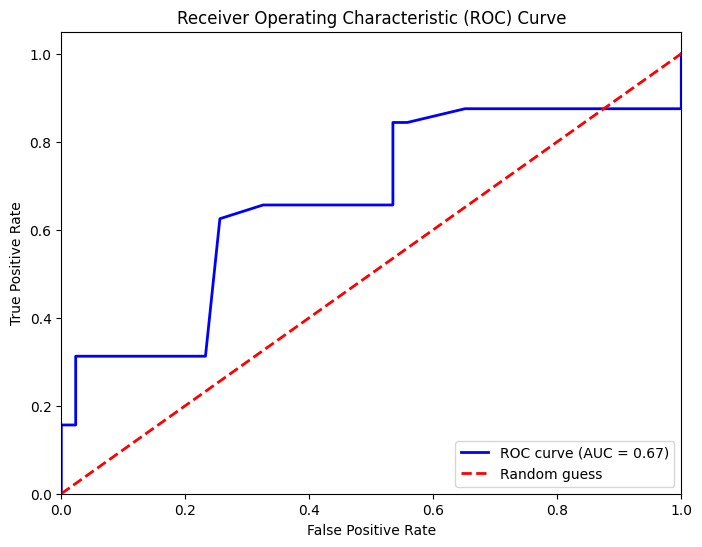

In [883]:
#Multiple logistic regression for physical activity level, heart rate and daily steps

#Define the independent variables (predictors)
X = sleep_data[['Heart Rate', 'Daily Steps', 'Physical Activity Level']]

#Define the dependent variable
y = sleep_data['Sleep Disorder (Yes/No)']

#Convert categorical variable to numerical (0 or 1)
y = y.replace({'Yes': 1, 'No': 0})

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize the logistic regression model
model = LogisticRegression()

#Fit the model to the training data
model.fit(X_train, y_train)

#Make predictions on the testing data
y_pred = model.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Generate classification report
print(classification_report(y_test, y_pred))

#Compute predicted probabilities
y_pred_proba = model.predict_proba(X_test)[:,1]

#Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

#Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


Accuracy: 0.8666666666666667
              precision    recall  f1-score   support

           0       0.85      0.93      0.89        43
           1       0.89      0.78      0.83        32

    accuracy                           0.87        75
   macro avg       0.87      0.86      0.86        75
weighted avg       0.87      0.87      0.87        75



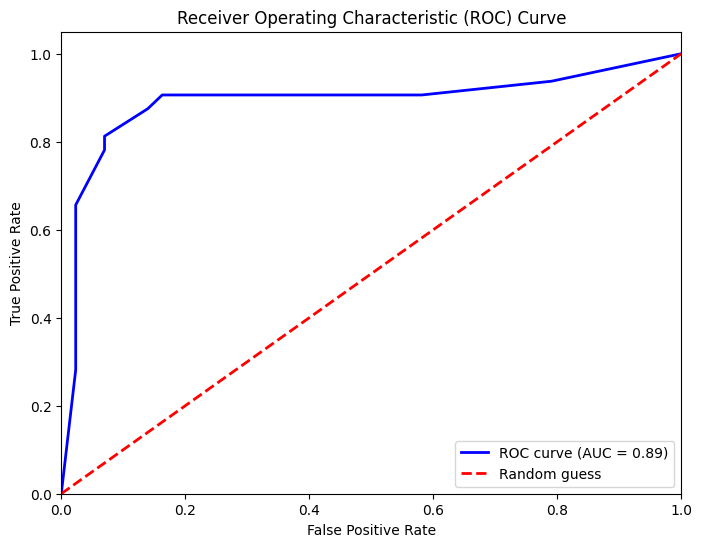

In [884]:
#Logistic regression on Occupation and sleep disorder likelihood

#Define the independent variable (predictor)
X = pd.get_dummies(sleep_data[['Occupation']], drop_first=True)

#Define the dependent variable
y = sleep_data['Sleep Disorder (Yes/No)']

#Convert categorical variable to numerical (0 or 1)
y = y.replace({'Yes': 1, 'No': 0})

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Initialize the logistic regression model
model = LogisticRegression()

#Fit the model to the training data
model.fit(X_train, y_train)

#Make predictions on the testing data
y_pred = model.predict(X_test)

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

#Generate classification report
print(classification_report(y_test, y_pred))

#Compute predicted probabilities
y_pred_proba = model.predict_proba(X_test)[:,1]

#Compute ROC curve and ROC AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()